<a href="https://colab.research.google.com/github/soham04/NLP_UTD/blob/main/NLP_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import string
from collections import Counter
import nltk
from nltk import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import sklearn
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Training dataset link
train_csv_url = 'https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv'
# Testing dataset link
test_csv_url = 'https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/test.csv'


# Load training and testing datasets
train_df = pd.read_csv(train_csv_url, header=None)
test_df = pd.read_csv(test_csv_url, header=None)

# Renaming columns
train_df.columns = ['category', 'title', 'description']
test_df.columns = ['category', 'title', 'description']


In [ ]:
# Pre-Processing
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text)
    return " ".join([lemmatizer.lemmatize(w.lower()) for w in tokens if w not in stop_words and w not in string.punctuation])

train_df['description'] = train_df['description'].apply(preprocess)
test_df['description'] = test_df['description'].apply(preprocess)


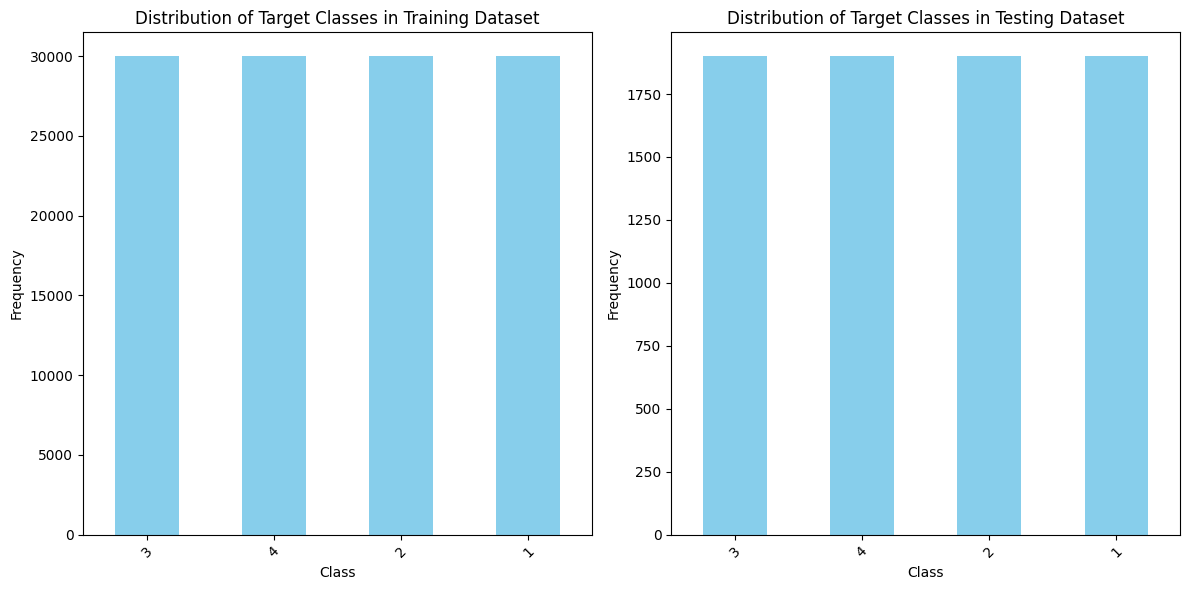

In [ ]:
# Code to display distribution of target classes
class_counts_train = train_df['category'].value_counts()
class_counts_test = test_df['category'].value_counts()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
class_counts_train.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Target Classes in Training Dataset')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
class_counts_test.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Target Classes in Testing Dataset')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Convert dataset to numerical data
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(train_df['description'])
x_test_counts = count_vect.transform(test_df['description'])

tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
x_test_tfidf = tfidf_transformer.transform(x_test_counts)

train_y = train_df['category']
test_y = test_df['category']

In [ ]:
# Naive Bayes Classifier
clf = MultinomialNB().fit(x_train_tfidf, train_y)
y_score = clf.predict(x_test_tfidf)
accuracy = accuracy_score(test_y, y_score)
print("Naive Bayes Classifier accuracy: %.2f%%" % (accuracy * 100))

Naive Bayes Classifier accuracy: 89.36%


In [ ]:
# Logistic Regression
logreg = LogisticRegression(max_iter=2000)
logreg.fit(x_train_tfidf, train_y)
predicted_y = logreg.predict(x_test_tfidf)
accuracy = accuracy_score(test_y, predicted_y)
print(f'Logistic Regression model accuracy: {accuracy*100:.2f}%')

Logistic Regression model accuracy: 90.54%


In [ ]:
# Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=1000, random_state=1)
mlp.fit(x_train_tfidf, train_y)
predicted_y = mlp.predict(x_test_tfidf)
accuracy = accuracy_score(test_y, predicted_y)
print(f'Neural Network model accuracy: {accuracy*100:.2f}%')


Neural Network model accuracy: 87.07%


# Analysis of the performance of models

The **Naive Bayes classifier** stood out as the easiest to implement, requiring minimal setup time, yet achieving a respectable accuracy of **89.36%.** In contrast, the **Logistic regression algorithm** demanded slightly more time, around *54 seconds*, but delivered the second-highest accuracy at **90.54%**. Despite its longer runtime, regardless of hyperparameters, the **neural network** still achieved a commendable accuracy of approximately **87.07%** exceeding 30 minutes.

In summary, logistic regression emerged as the top performer for this dataset due to its combination of high accuracy and efficient training time compared to the other models. However, it's worth noting that the dataset, while large, was relatively straightforward, which limited the opportunity for neural networks to demonstrate their full potential.